In [5]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import classification_report,recall_score,confusion_matrix,roc_auc_score,precision_score

In [10]:
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
from xgboost import XGBClassifier

In [59]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.feature_selection import RFE

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_used=pd.read_csv('BANKMARKETING_NEW.csv')
data_used.head()

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,4,1,4,1.321012,1,2,1,0,0.388447,1,0,2,-1.313504,8,-0.237613,-0.66928,-0.476238,-0.453798,0
1,3,1,9,0.076247,2,1,1,0,-0.631032,1,0,2,-1.313504,8,-0.593305,-0.66928,-0.476238,-0.453798,0
2,2,1,2,1.943394,1,1,1,0,-0.644053,1,1,2,-1.313504,8,-0.835821,-0.66928,-0.476238,-0.453798,0
3,3,1,1,-1.168518,1,3,0,0,0.081253,1,0,2,-1.313504,8,-0.784084,-0.66928,-0.476238,-0.453798,0
4,2,1,11,-1.790901,2,3,0,0,-0.644535,0,0,2,-1.313504,8,-0.441327,-0.66928,-0.476238,-0.453798,0


In [3]:
data_used.shape

(63755, 19)

**Already Scaled**

In [4]:
x=data_used.drop('response',1)
y=pd.DataFrame(data_used['response'])

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=52)

In [7]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((44628, 18), (19127, 18), (44628, 1), (19127, 1))

In [11]:
base_gnb=GaussianNB()

In [ ]:
base_knn=KNeighborsClassifier()

In [13]:
base_dt=DecisionTreeClassifier()

In [15]:
base_rf=RandomForestClassifier()

In [17]:
base_abc=AdaBoostClassifier()

In [19]:
base_gbc=GradientBoostingClassifier()

In [21]:
base_xgb=XGBClassifier()

In [24]:
recall_scores=[]
roc_auc_scores=[]
Bias_errors_Percentage=[]
Variance_errors_Percentage=[]
precision_scores=[]

In [25]:
def build_model(model):
    model_ins=model.fit(xtrain,ytrain)
    print('Classification Report Train Data:\n')
    print(classification_report(ytrain,model_ins.predict(xtrain)))
    print('Classification Report Test Data:\n')
    print(classification_report(ytest,model_ins.predict(xtest)))
    precision_scores.append(((precision_score(ytrain,model_ins.predict(xtrain)))+(precision_score(ytest,model_ins.predict(xtest))))/2)
    print('Precision Score train:',precision_score(ytrain,model_ins.predict(xtrain)))
    print('Precision Score test:',precision_score(ytest,model_ins.predict(xtest)))
    recall_scores.append(((recall_score(ytrain,model_ins.predict(xtrain)))+(recall_score(ytest,model_ins.predict(xtest))))/2)
    print('Recall Score train:',recall_score(ytrain,model_ins.predict(xtrain)))
    print('Recall Score test:',recall_score(ytest,model_ins.predict(xtest)))
    roc_auc_scores.append(roc_auc_score(ytest,model_ins.predict_proba(xtest)[:,1]))
    print('Roc_Auc_Score:',roc_auc_score(ytest,model_ins.predict_proba(xtest)[:,1]))
    k  = KFold(n_splits=5,shuffle=True, random_state=10)
    scores = cross_val_score(model_ins,x,y,cv=k,scoring='roc_auc')
    print(scores)
    Bias_errors_Percentage.append((1-np.mean(scores))*100)
    Variance_errors_Percentage.append(np.std(scores)*100/np.mean(scores))
    print('Bias Error:',(1-np.mean(scores))*100)
    print('Variance Error:',np.std(scores)*100/np.mean(scores))

In [26]:
build_model(base_knn)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     27934
           1       0.89      0.92      0.90     16694

    accuracy                           0.93     44628
   macro avg       0.92      0.92      0.92     44628
weighted avg       0.93      0.93      0.93     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11988
           1       0.86      0.87      0.86      7139

    accuracy                           0.90     19127
   macro avg       0.89      0.89      0.89     19127
weighted avg       0.90      0.90      0.90     19127

Precision Score train: 0.8917516758962402
Precision Score test: 0.8579726178951735
Recall Score train: 0.9163771414879598
Recall Score test: 0.8690292758089369
Roc_Auc_Score: 0.951905213333051
[0.95262968 0.95288615 0.94831019 0.94982806 0.95348372]
Bias Error: 4.8572438780177

**KNN is not performing well as it is Overfitting as it has high bias error**

In [27]:
build_model(base_gnb)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     27934
           1       0.64      0.89      0.74     16694

    accuracy                           0.77     44628
   macro avg       0.78      0.79      0.77     44628
weighted avg       0.81      0.77      0.77     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     11988
           1       0.64      0.89      0.74      7139

    accuracy                           0.77     19127
   macro avg       0.78      0.79      0.77     19127
weighted avg       0.81      0.77      0.77     19127

Precision Score train: 0.6393301104972375
Precision Score test: 0.6389982833484803
Recall Score train: 0.8872648855876363
Recall Score test: 0.8863986552738479
Roc_Auc_Score: 0.8692152604581984
[0.8688735  0.87605016 0.86746039 0.86391602 0.86619016]
Bias Error: 13.15019531814

In [28]:
build_model(base_dt)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27934
           1       1.00      1.00      1.00     16694

    accuracy                           1.00     44628
   macro avg       1.00      1.00      1.00     44628
weighted avg       1.00      1.00      1.00     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     11988
           1       0.83      0.84      0.84      7139

    accuracy                           0.88     19127
   macro avg       0.87      0.87      0.87     19127
weighted avg       0.88      0.88      0.88     19127

Precision Score train: 1.0
Precision Score test: 0.8274299835255354
Recall Score train: 1.0
Recall Score test: 0.8442358873791848
Roc_Auc_Score: 0.8696905162621649
[0.87642208 0.88126103 0.8705521  0.87239593 0.87387904]
Bias Error: 12.50979624959172
Variance Error: 0.42458899

In [29]:
build_model(base_rf)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27934
           1       1.00      1.00      1.00     16694

    accuracy                           1.00     44628
   macro avg       1.00      1.00      1.00     44628
weighted avg       1.00      1.00      1.00     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11988
           1       0.89      0.91      0.90      7139

    accuracy                           0.92     19127
   macro avg       0.92      0.92      0.92     19127
weighted avg       0.92      0.92      0.92     19127

Precision Score train: 1.0
Precision Score test: 0.889270504190136
Recall Score train: 1.0
Recall Score test: 0.9067096231965261
Roc_Auc_Score: 0.9777767565389548
[0.9788138  0.97879646 0.97794978 0.97767718 0.97908294]
Bias Error: 2.1535968047945886
Variance Error: 0.05596814

In [30]:
build_model(base_abc)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     27934
           1       0.85      0.82      0.83     16694

    accuracy                           0.88     44628
   macro avg       0.87      0.87      0.87     44628
weighted avg       0.88      0.88      0.88     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     11988
           1       0.85      0.82      0.84      7139

    accuracy                           0.88     19127
   macro avg       0.87      0.87      0.87     19127
weighted avg       0.88      0.88      0.88     19127

Precision Score train: 0.8468557336621455
Precision Score test: 0.8518572257690076
Recall Score train: 0.8228105906313645
Recall Score test: 0.8223840874071999
Roc_Auc_Score: 0.9458232453866764
[0.94607033 0.94740042 0.94428433 0.94706234 0.94589949]
Bias Error: 5.385661858507

In [31]:
build_model(base_gbc)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     27934
           1       0.86      0.85      0.86     16694

    accuracy                           0.89     44628
   macro avg       0.88      0.88      0.88     44628
weighted avg       0.89      0.89      0.89     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     11988
           1       0.86      0.86      0.86      7139

    accuracy                           0.89     19127
   macro avg       0.89      0.89      0.89     19127
weighted avg       0.89      0.89      0.89     19127

Precision Score train: 0.8571514531560263
Precision Score test: 0.8581669946584201
Recall Score train: 0.8533005870372589
Recall Score test: 0.8551617873651772
Roc_Auc_Score: 0.9597074136750563
[0.95997802 0.95996199 0.95798823 0.95797143 0.9581551 ]
Bias Error: 4.118904676045

In [32]:
build_model(base_xgb)

[21:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     27934
           1       0.93      0.94      0.93     16694

    accuracy                           0.95     44628
   macro avg       0.95      0.95      0.95     44628
weighted avg       0.95      0.95      0.95     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11988
           1       0.89      0.89      0.89      7139

    accuracy                           0.92     19127
   macro avg       0.91      0.91      0.91     19127
weighted avg       0.9

In [33]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [34]:
build_model(lgr)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     27934
           1       0.83      0.79      0.81     16694

    accuracy                           0.86     44628
   macro avg       0.85      0.85      0.85     44628
weighted avg       0.86      0.86      0.86     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11988
           1       0.83      0.79      0.81      7139

    accuracy                           0.86     19127
   macro avg       0.85      0.85      0.85     19127
weighted avg       0.86      0.86      0.86     19127

Precision Score train: 0.8275430359937402
Precision Score test: 0.8274849508148583
Recall Score train: 0.7919012818976878
Recall Score test: 0.7894663118083766
Roc_Auc_Score: 0.9286442323165487
[0.92902824 0.93057063 0.927799   0.92884607 0.92653775]
Bias Error: 7.144366414209

In [35]:
index=['KNN','Naive Bayes','Decision Tree','Random Forest','AdaBoosting',
       'Gradient Boosting','Xtreme Gradient Boosting','Logistic Regression']

In [36]:
Report=pd.DataFrame({'Models':index})

In [37]:
Report=Report.set_index('Models')

In [38]:
Report['Precision Score']=precision_scores

In [39]:
Report['Recall Score']=recall_scores

In [40]:
Report['ROC_AUC_Scores']=roc_auc_scores

In [41]:
Report['Bias Error Percentage']=Bias_errors_Percentage

In [42]:
Report['Variance Error Percentage']=Variance_errors_Percentage

In [43]:
Report

,Precision Score,Recall Score,ROC_AUC_Scores,Bias Error Percentage,Variance Error Percentage
Models,,,,,
KNN,0.874862,0.892703,0.951905,4.857244,0.210614
Naive Bayes,0.639164,0.886832,0.869215,13.150195,0.473547
Decision Tree,0.913715,0.922118,0.869691,12.509796,0.424589
Random Forest,0.944635,0.953355,0.977777,2.153597,0.055968
AdaBoosting,0.849356,0.822597,0.945823,5.385662,0.115253
Gradient Boosting,0.857659,0.854231,0.959707,4.118905,0.098930
Xtreme Gradient Boosting,0.911964,0.914604,0.976346,2.349095,0.074189
Logistic Regression,0.827514,0.790684,0.928644,7.144366,0.144585


**With this base model report We can see that Random Forest Model Performs better than the other models.**

**The Next Best Model is Xtreme Gradient Boosting.**

**The Other model with good performance is Gradient Boosting.**

**We can do Hyper Parameter Tuning for these models and get the better performing final model**

# Feature Selection

In [45]:
rfe=RFE(base_rf,verbose=2)
rfe.fit(xtrain,ytrain)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


RFE(estimator=RandomForestClassifier(), verbose=2)

In [46]:
rfe_rf=pd.DataFrame({'Rank':rfe.ranking_,'Columns':xtrain.columns})
rfe_rf.sort_values(by='Rank',ascending=True)

,Rank,Columns
8,1,balance
15,1,campaign
2,1,job
14,1,duration
13,1,month
12,1,day
11,1,contact
9,1,housing
16,1,pdays
0,2,age group


In [47]:
Important_Features=pd.DataFrame(rfe_rf.Columns[rfe_rf['Rank']==1])

In [48]:
New_data_used=data_used[Important_Features.Columns]

In [49]:
New_xtrain,New_xtest,New_ytrain,New_ytest=train_test_split(New_data_used,y,test_size=0.3,random_state=50)

In [50]:
def build_model_new(model):
    model_ins=model.fit(New_xtrain,New_ytrain)
    print('Classification Report Train Data:\n')
    print(classification_report(New_ytrain,model_ins.predict(New_xtrain)))
    print('Classification Report Test Data:\n')
    print(classification_report(New_ytest,model_ins.predict(New_xtest)))
    print('Recall Score:',recall_score(New_ytest,model_ins.predict(New_xtest)))
    print('Roc_Auc_Score:',roc_auc_score(New_ytest,model_ins.predict_proba(New_xtest)[:,1]))
    k  = KFold(n_splits=5,shuffle=True, random_state=10)
    scores = cross_val_score(model_ins,New_data_used,y,cv=k,scoring='recall')
    print(scores)
    print('Bias Error:',(1-np.mean(scores))*100)
    print('Variance Error:',np.std(scores)*100/np.mean(scores))

In [51]:
build_model_new(base_rf)

Classification Report Train Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27935
           1       1.00      1.00      1.00     16693

    accuracy                           1.00     44628
   macro avg       1.00      1.00      1.00     44628
weighted avg       1.00      1.00      1.00     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11987
           1       0.87      0.90      0.88      7140

    accuracy                           0.91     19127
   macro avg       0.90      0.91      0.90     19127
weighted avg       0.91      0.91      0.91     19127

Recall Score: 0.8952380952380953
Roc_Auc_Score: 0.9689823522635048
[0.90956887 0.90715026 0.89874495 0.89697099 0.89987664]
Bias Error: 9.75376567365439
Variance Error: 0.5499003899421996


**We can see no difference after Feature Selection**

In [52]:
rfe_xgb=RFE(base_xgb,verbose=2)
rfe_xgb.fit(xtrain,ytrain)

Fitting estimator with 18 features.
[21:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 17 features.
[21:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting estimator with 16 features.
[21:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if yo

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, gamma=0, gpu_id=-1,
                            importance_type='gain', interaction_constraints='',
                            learning_rate=0.300000012, max_delta_step=0,
                            max_depth=6, min_child_weight=1, missing=nan,
                            monotone_constraints='()', n_estimators=100,
                            n_jobs=8, num_parallel_tree=1, random_state=0,
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                            subsample=1, tree_method='exact',
                            validate_parameters=1, verbosity=None),
    verbose=2)

In [53]:
rfe_xgb1=pd.DataFrame({'Rank':rfe_xgb.ranking_,'Columns':xtrain.columns})
rfe_xgb1.sort_values(by='Rank',ascending=True)

,Rank,Columns
1,1,eligible
14,1,duration
5,1,education
6,1,targeted
13,1,month
16,1,pdays
9,1,housing
10,1,loan
11,1,contact
4,2,marital


In [54]:
Important_Features_xgb=pd.DataFrame(rfe_xgb1.Columns[rfe_xgb1['Rank']==1])

In [55]:
New_data_used1=data_used[Important_Features_xgb.Columns]

In [56]:
New_xtrain1,New_xtest1,New_ytrain1,New_ytest1=train_test_split(New_data_used1,y,test_size=0.3,random_state=50)

In [57]:
def build_model_new(model):
    model_ins=model.fit(New_xtrain1,New_ytrain1)
    print('Classification Report Train Data:\n')
    print(classification_report(New_ytrain1,model_ins.predict(New_xtrain1)))
    print('Classification Report Test Data:\n')
    print(classification_report(New_ytest1,model_ins.predict(New_xtest1)))
    print('Recall Score:',recall_score(New_ytest1,model_ins.predict(New_xtest1)))
    print('Roc_Auc_Score:',roc_auc_score(New_ytest1,model_ins.predict_proba(New_xtest1)[:,1]))
    k  = KFold(n_splits=5,shuffle=True, random_state=10)
    scores = cross_val_score(model_ins,New_data_used1,y,cv=k,scoring='roc_auc')
    print(scores)
    print('Bias Error:',(1-np.mean(scores))*100)
    print('Variance Error:',np.std(scores)*100/np.mean(scores))

In [58]:
build_model_new(base_xgb)

[21:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report Train Data:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27935
           1       0.88      0.88      0.88     16693

    accuracy                           0.91     44628
   macro avg       0.91      0.91      0.91     44628
weighted avg       0.91      0.91      0.91     44628

Classification Report Test Data:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11987
           1       0.85      0.85      0.85      7140

    accuracy                           0.89     19127
   macro avg       0.88      0.88      0.88     19127
weighted avg       0.8

# **Random Forest Model - Hyper Parameter Tuning**

In [60]:
params={'n_estimators':[100,110,120,130,140,150],
        'criterion':['gini','entropy'],
        'max_depth':np.arange(1,18)
        }
gd = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5,scoring='recall')
gd.fit(xtrain,ytrain)
gd.best_params_

{'criterion': 'gini', 'max_depth': 17, 'n_estimators': 140}

In [61]:
tunned_rf = RandomForestClassifier(**gd.best_params_) 

In [62]:
tunned_rf.fit(xtrain,ytrain)
y_test_pred_tunned = tunned_rf.predict(xtest)

In [63]:
y_train_pred_tunned = tunned_rf.predict(xtrain)
print(classification_report(ytrain,y_train_pred_tunned))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     27934
           1       0.97      0.98      0.97     16694

    accuracy                           0.98     44628
   macro avg       0.98      0.98      0.98     44628
weighted avg       0.98      0.98      0.98     44628



In [64]:
print(classification_report(ytest,y_test_pred_tunned))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11988
           1       0.88      0.90      0.89      7139

    accuracy                           0.92     19127
   macro avg       0.91      0.92      0.91     19127
weighted avg       0.92      0.92      0.92     19127



In [65]:
k  = KFold(n_splits=5,shuffle=True, random_state=10)
scores_rf = cross_val_score(tunned_rf,xtrain,ytrain,cv=k,scoring='roc_auc')
print(scores_rf)
print('Bias Error:',(1-np.mean(scores_rf))*100)
print('Variance Error:',np.std(scores_rf)*100/np.mean(scores_rf))

[0.97235086 0.97280343 0.97261512 0.97133088 0.97339153]
Bias Error: 2.750163526846161
Variance Error: 0.06957761044504278


In [66]:
important_features_rf = pd.DataFrame({'Scores':tunned_rf.feature_importances_,'Features':x.columns})
important_features_rf.sort_values(by='Scores',ascending=False)

,Scores,Features
14,0.326885,duration
9,0.093781,housing
16,0.078606,pdays
11,0.065205,contact
13,0.062788,month
8,0.054472,balance
12,0.052484,day
0,0.036546,age group
15,0.032864,campaign
5,0.031116,education


# XGBCLASSIFIER - HYPERPARAMETER TUNING

In [67]:
params={'max_depth':np.arange(1,18)}
gd = GridSearchCV(estimator=XGBClassifier(),param_grid=params,cv=5,scoring='recall')
gd.fit(xtrain,ytrain)
gd.best_params_

[21:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'max_depth': 15}

In [68]:
xgb_tunned=XGBClassifier(**gd.best_params_)

In [69]:
xgb_tunned.fit(xtrain,ytrain)

[22:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
xgb_tunned.fit(xtrain,ytrain)
y_test_pred_tunned_xgb = xgb_tunned.predict(xtest)

[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
y_train_pred_tunned_xgb = xgb_tunned.predict(xtrain)
print(classification_report(ytrain,y_train_pred_tunned_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27934
           1       1.00      1.00      1.00     16694

    accuracy                           1.00     44628
   macro avg       1.00      1.00      1.00     44628
weighted avg       1.00      1.00      1.00     44628



In [72]:
print(classification_report(ytest,y_test_pred_tunned_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     11988
           1       0.90      0.92      0.91      7139

    accuracy                           0.93     19127
   macro avg       0.92      0.93      0.92     19127
weighted avg       0.93      0.93      0.93     19127



In [73]:
k  = KFold(n_splits=5,shuffle=True, random_state=10)
scores_xgb_rocauc = cross_val_score(xgb_tunned,xtrain,ytrain,cv=k,scoring='roc_auc')
print(scores_xgb_rocauc)
print('Bias Error:',(1-np.mean(scores_xgb_rocauc))*100)
print('Variance Error:',np.std(scores_xgb_rocauc)*100/np.mean(scores_xgb_rocauc))

[22:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [74]:
Report

,Precision Score,Recall Score,ROC_AUC_Scores,Bias Error Percentage,Variance Error Percentage
Models,,,,,
KNN,0.874862,0.892703,0.951905,4.857244,0.210614
Naive Bayes,0.639164,0.886832,0.869215,13.150195,0.473547
Decision Tree,0.913715,0.922118,0.869691,12.509796,0.424589
Random Forest,0.944635,0.953355,0.977777,2.153597,0.055968
AdaBoosting,0.849356,0.822597,0.945823,5.385662,0.115253
Gradient Boosting,0.857659,0.854231,0.959707,4.118905,0.098930
Xtreme Gradient Boosting,0.911964,0.914604,0.976346,2.349095,0.074189
Logistic Regression,0.827514,0.790684,0.928644,7.144366,0.144585


In [77]:
import seaborn as sb

In [78]:
import matplotlib.pyplot as mp

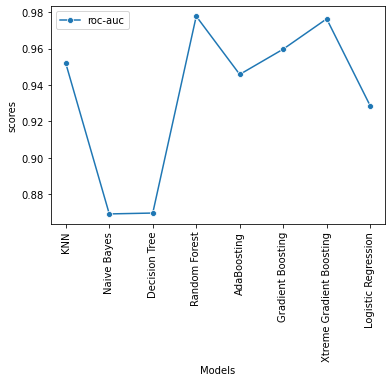

In [83]:
sb.lineplot(x=Report.index,y=Report['ROC_AUC_Scores'],
            marker='o',label='roc-auc')
mp.ylabel('scores')
mp.xticks(rotation=90);

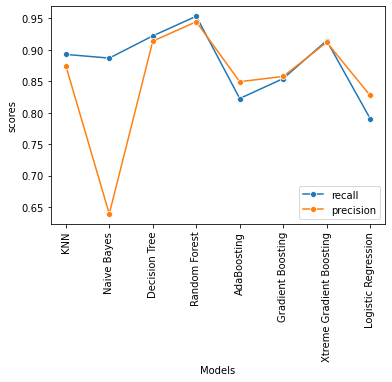

In [80]:
sb.lineplot(x=Report.index,y=Report['Recall Score'],
            marker='o',label='recall')
sb.lineplot(x=Report.index,y=Report['Precision Score'],
            marker='o',label='precision')
mp.ylabel('scores')
mp.xticks(rotation=90);

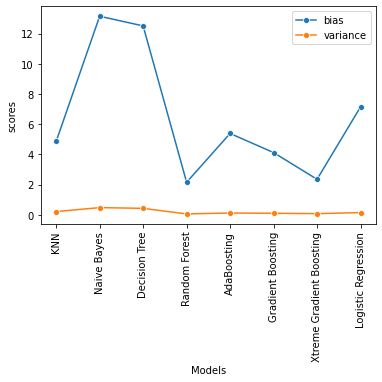

In [82]:
sb.lineplot(x=Report.index,y=Report['Bias Error Percentage'],
            marker='o',label='bias')
sb.lineplot(x=Report.index,y=Report['Variance Error Percentage'],
            marker='o',label='variance')
mp.ylabel('scores')
mp.xticks(rotation=90);

**According to these graph, we can say that Random Forest and XGBoosting Algorithms will work in prediction considering 
Precision,recall,roc-auc score,bias error and variance error.**